## Exploratory Project - Smit Lunagariya


#### Implementation of Twin Support Vector Regression

In [1]:
# Importing required libraries

import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Importing Twin Support Vector Regression Class from twinsvr
from twinsvr import TwinSVR

In [3]:
# Creating the artificial data set
x = np.linspace(-10.2,10,num=81).reshape(-1,1)
y = np.sin(x)/x
yhat = y + np.random.normal(scale=0.1,size=81).reshape(-1,1) #Adding noise to original labels

In [4]:
tsvr = TwinSVR(c1=0.10, c2=0.10, e1=10, e2=10, sigma=81, regul=0.00000001)

In [5]:
# Fit the data features that are to be learned by the model
tsvr.fit(x, yhat)

     pcost       dcost       gap    pres   dres
 0: -1.7633e-01 -8.8256e+00  2e+02  1e+01  8e-16
 1:  6.5691e-02 -8.0253e+00  8e+00  2e-15  2e-15
 2:  3.8422e-02 -5.6134e-01  6e-01  2e-16  2e-15
 3: -1.0565e-01 -2.0649e-01  1e-01  1e-16  7e-16
 4: -1.5164e-01 -1.6817e-01  2e-02  2e-16  4e-16
 5: -1.5988e-01 -1.6096e-01  1e-03  2e-16  4e-16
 6: -1.6043e-01 -1.6049e-01  6e-05  2e-16  4e-16
 7: -1.6047e-01 -1.6047e-01  2e-06  2e-16  4e-16
 8: -1.6047e-01 -1.6047e-01  3e-08  2e-16  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7632e-01 -8.8256e+00  2e+02  1e+01  9e-16
 1:  6.5693e-02 -8.0253e+00  8e+00  2e-15  2e-15
 2:  3.8426e-02 -5.6133e-01  6e-01  2e-16  1e-15
 3: -1.0564e-01 -2.0648e-01  1e-01  1e-16  6e-16
 4: -1.5164e-01 -1.6817e-01  2e-02  2e-16  4e-16
 5: -1.5987e-01 -1.6095e-01  1e-03  2e-16  4e-16
 6: -1.6043e-01 -1.6048e-01  6e-05  2e-16  4e-16
 7: -1.6046e-01 -1.6046e-01  2e-06  2e-16  3e-16
 8: -1.6046e-01 -1.6046e-01  3e-08  2e-16  4e-1

In [6]:
pred = tsvr.predict(x)

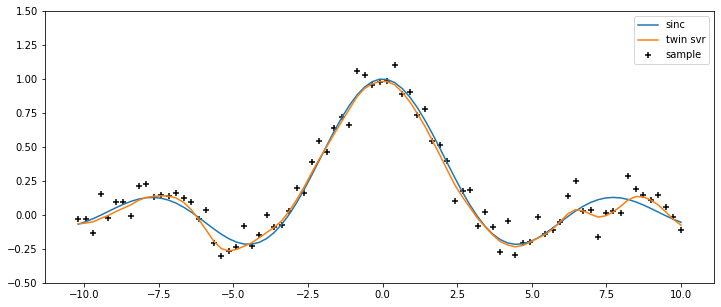

In [7]:
# Visualizing the original synthetic dataset with the output produced
plt.figure(figsize=(12,5))
plt.plot(x, y, label='sinc')
plt.scatter(x, yhat, marker='+', label='sample', color='black')
plt.plot(x, pred, label='twin svr')
plt.ylim([-0.5,1.5])
plt.legend()

In [8]:
# Evaluation of the results based on various metrics
def Evaluation_of_result(y, ypred):
    def mean_abs_error(y, ypred):
        return mean_absolute_error(y, ypred)

    def root_mean_sq_error(y, ypred):
        return math.sqrt(mean_squared_error(y, ypred))

    def SSE(y, ypred):
        y.reshape(-1,1)
        ypred.reshape(-1,1)
        return mean_squared_error(y, ypred)*(y.shape[0])

    def SST(y):
        y.reshape(-1,1)
        return np.var(y)*(y.shape[0])

    def SSR(ypred):
        ypred.reshape(-1,1)
        return np.var(ypred)*(ypred.shape[0])

    print("MAE: ", mean_abs_error(y, ypred))
    print("RMSE: ", root_mean_sq_error(y, ypred))
    print("SSE: ", SSE(y, ypred))
    print("SSR: ", SSR(ypred))
    print("SST: ", SST(y))
    print("SSR/SST: ", SSR(ypred)/SST(y))
    print("SSE/SST: ", SSE(y,ypred)/SST(y))

In [9]:
print("The evaluation of results of Twin SVR are as follows:")
Evaluation_of_result(y,pred)

The evaluation of results of Twin SVR are as follows:
MAE:  0.03129386791566023
RMSE:  0.04201300412953474
SSE:  0.14297249379505256
SSR:  9.768962138882479
SST:  9.942618950174554
SSR/SST:  0.9825340976897213
SSE/SST:  0.014379761963274527
